# Table of Contents

- [Introduction](#introduction)
- [1. Importing Packages](#section-one)
- [2. Loading Data](#section-two)
    - [2.1 Overview of the Data](#subsection-one)
- [3. Data Preprocessing Steps: Enhancing the Data for Analysis](#section-three)
    - [3.1. Merge all the data](#subsection-one)
    - [3.2. Change the datatype of date column](#subsection-two)     
    - [3.3. Convert the values of the column to absolute and change the datatype](#subsection-three) 
- [4. Exploratory Data Analysis](#section-four)
- [5. Feature Engineering](#section-five)
- [6. Modeling](#section-six)

<a id="section-one"></a>
# 1. Importing Packages 

In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector as selector 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


<a id="section-two"></a>
# 2. Loading Data

In [34]:
sales_train = pd.read_csv("sales_train.csv")
shops = pd.read_csv("shops.csv")
items = pd.read_csv("items.csv")
items_categories = pd.read_csv("item_categories.csv")
test = pd.read_csv("test.csv", index_col="ID")

<a id="subsection-one"></a>
## 2.1 Overview of the Data

In [35]:
# Display the shape and first 
print(sales_train.shape)
sales_train.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [36]:
print(shops.shape)
shops.head()

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [37]:
print(items.shape)
items.head()

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [38]:
print(items_categories.shape)
items_categories.head()

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


<a id="section-three"></a>
# 3. Data Preprocessing Steps: Enhancing the Data for Analysis

<a id="subsection-one"></a>
## 3.1. Merge all the data

In [39]:
merged_data = sales_train.merge(shops, on="shop_id", how="left")
merged_data = merged_data.merge(items, on="item_id", how="left")
merged_data = merged_data.merge(items_categories, on="item_category_id", how="left")

train = merged_data

In [40]:
# print the number of columns and features in the train dataset
print(f"The train dataset contains {train.shape[0]} columns and {train.shape[0]} features.")

# Display the head of the merged data `train`
train.head()

The train dataset contains 2935849 columns and 2935849 features.


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   shop_name           object 
 7   item_name           object 
 8   item_category_id    int64  
 9   item_category_name  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [42]:
train.describe().T.apply(lambda s: s.apply(lambda x: format(x, "f")))

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.000000,14.569911,9.422988,0.000000,7.000000,14.000000,23.000000,33.000000
shop_id,2935849.000000,33.001728,16.226973,0.000000,22.000000,31.000000,47.000000,59.000000
item_id,2935849.000000,10197.227057,6324.297354,0.000000,4476.000000,9343.000000,15684.000000,22169.000000
item_price,2935849.000000,890.853233,1729.799631,-1.000000,249.000000,399.000000,999.000000,307980.000000
item_cnt_day,2935849.000000,1.242641,2.618834,-22.000000,1.000000,1.000000,1.000000,2169.000000
item_category_id,2935849.000000,40.001383,17.100759,0.000000,28.000000,40.000000,55.000000,83.000000


In [43]:
n_missing = train.isnull().sum()
n_missing[n_missing != 0]

Series([], dtype: int64)

In [44]:
print(f"The test dataset contains {test.shape[0]} columns and {test.shape[1]} features.")
test.head()

The test dataset contains 214200 columns and 2 features.


,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


<a id="subsection-two"></a>
## 3.2. Change the datatype of date column

In [45]:
train["date"] = pd.to_datetime(train["date"], dayfirst=True)

train["date"].dtype

dtype('<M8[ns]')

<a id="subsection-three"></a>
## 3.3. Convert the values of the column to absolute and change the datatype

In [46]:
train["item_cnt_day"] = train["item_cnt_day"].abs()

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-03,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,2013-01-05,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,2013-01-06,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,2013-01-15,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства


<a id="section-four"></a>
# 4. Exploratory Data Analysis 

### What month occur the most in the dataset? 

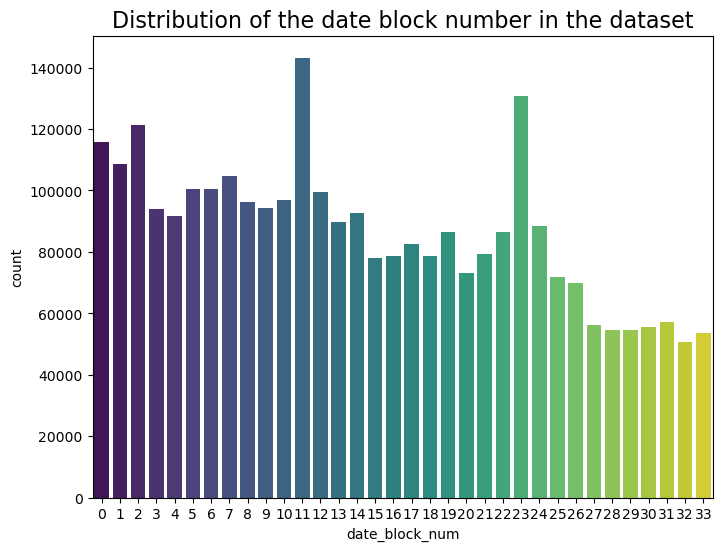

In [47]:
plt.figure(figsize=(8, 6))

sns.countplot(x="date_block_num", palette="viridis", data=train)
plt.title("Distribution of the date block number in the dataset", fontsize=16)
plt.show()

**Observation:** The most consecutive number of months is December of 2013 followed by another December which is of the following year 2014 

### How distributed is the number of item sold and is there any outliers?

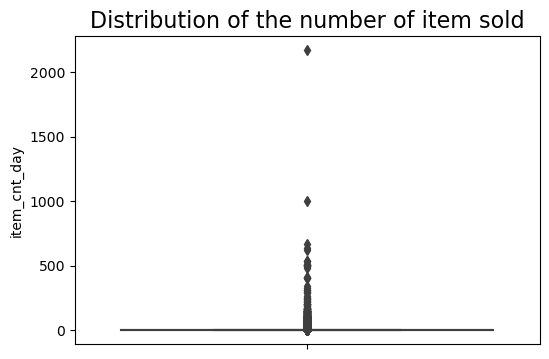

In [48]:
plt.figure(figsize=(6, 4))

sns.boxplot(y="item_cnt_day", data=train)
plt.title("Distribution of the number of item sold", fontsize=16)
plt.show()

**Observation:** There happens to be a lot of outliers in the column containing the number of items sold and is difficult to get the median from the boxplot

### What are the top 10 items sold the most in the dataset?

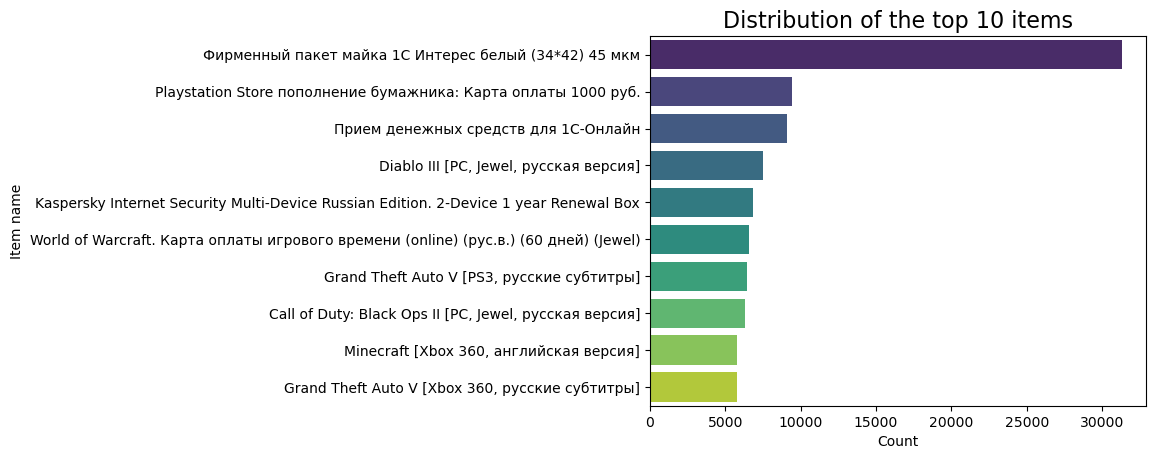

In [49]:
item_name_counts = train.item_name.value_counts()[:10]

sns.barplot(y=item_name_counts.index, x=item_name_counts.values, palette="viridis")
plt.xlabel("Count", fontsize=10)
plt.ylabel("Item name", fontsize=10)
plt.title("Distribution of the top 10 items", fontsize=16)
plt.show()

**Observation:** Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм is the most popular item sold among the top 10 item sold in the dataset followed by Playstation Store пополнение бумажника: Карта оплаты 1000 руб.

### What category have the most number of items sold?  

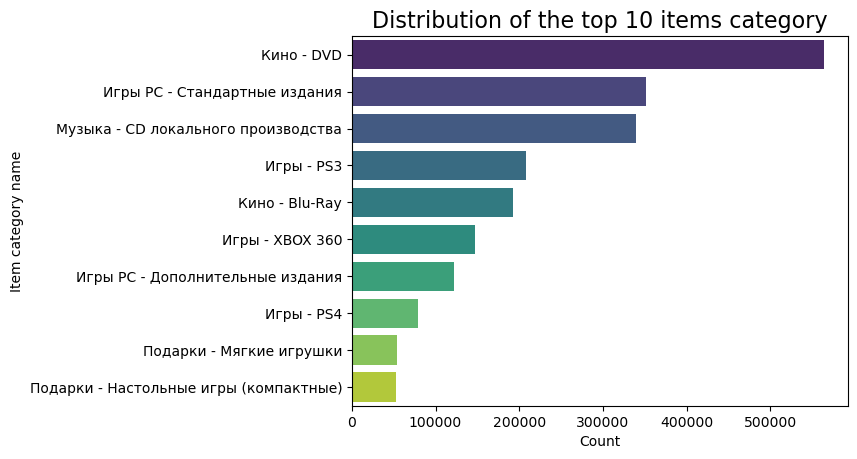

In [50]:
item_cat_name_counts = train.item_category_name.value_counts()[:10]

sns.barplot(y=item_cat_name_counts.index, x=item_cat_name_counts.values, palette="viridis")
plt.xlabel("Count", fontsize=10)
plt.ylabel("Item category name", fontsize=10)
plt.title("Distribution of the top 10 items category", fontsize=16)
plt.show()

**Observation:** Кино - DVD is the category where the number of items sold occur the most.

### What are the shop names that sold the most in the dataset?

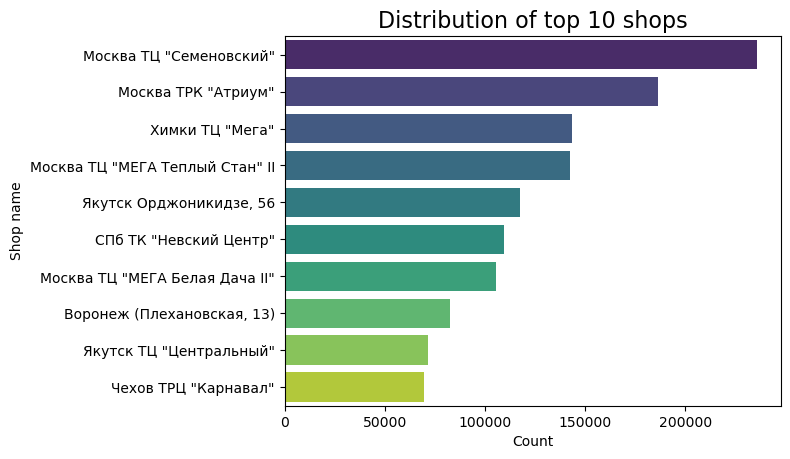

In [51]:
top_10_by_shop_name = train.shop_name.value_counts()[:10]

sns.barplot(y=top_10_by_shop_name.index, x=top_10_by_shop_name.values, palette="viridis")
plt.xlabel("Count", fontsize=10)
plt.ylabel("Shop name", fontsize=10)
plt.title("Distribution of top 10 shops", fontsize=16)
plt.show()

**Observation:** Москва ТЦ "Семеновский" is the shop with the number of items sold occur followed by Москва ТРК "Атриум" while the last of the top ten shops is Чехов ТРЦ "Карнавал".

### How does the prices of item varies over the course of years in the dataset? 

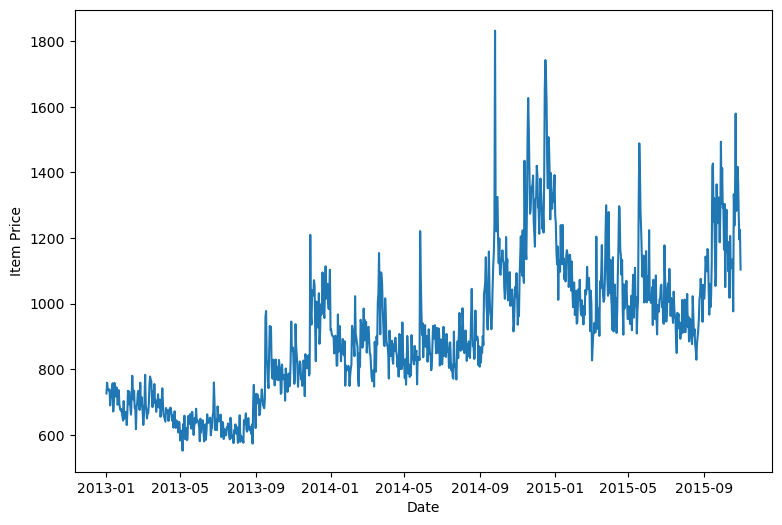

In [52]:
plt.figure(figsize=(9, 6))

sns.lineplot(x="date", y="item_price", data=train, errorbar=None)
plt.xlabel("Date")
plt.ylabel("Item Price")
plt.show()

**Observation:** The prices of items increases of the years though there happen to be a little decrease around 2015 which later increase and decrease over the course of the year. Shortly after september 2014 is where the highest increase in prices of item occur.

<a id="section-five"></a>
# 5. Feature Engineering 

In [53]:
train = train.drop(["date"], axis="columns")

train.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'shop_name', 'item_name', 'item_category_id', 'item_category_name'],
      dtype='object')

<a id="section-six"></a>
# 6. Modeling

In [54]:
X = train.drop(["item_price"], axis="columns")

y = train["item_price"]

In [58]:
numerical_cols = selector(dtype_exclude="object")
categorical_cols = selector(dtype_include="object")

categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ("ordinal encoder", categorical_preprocessor, categorical_cols),
    ("standard-scaler", numerical_preprocessor, numerical_cols)
])

preprocessor

ColumnTransformer(transformers=[('ordinal encoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7B490>),
                                ('standard-scaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7BF10>)])

In [59]:
model = make_pipeline(preprocessor, RandomForestRegressor())

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7B490>),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7BF10>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

In [62]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7B490>),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7BF10>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [67]:
print(f"The RMSE of Random Forest is {mean_squared_error(y_valid, model.predict(X_valid), squared=False)}")

The RMSE of Random Forest is 218.94981323469102


In [64]:
model_two = make_pipeline(preprocessor, GradientBoostingRegressor())

model_two

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7B490>),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7BF10>)])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [65]:
model_two.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7B490>),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025B2CD7BF10>)])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [66]:
print(f"The RMSE of Gradient Boosting is {mean_squared_error(y_valid, model_two.predict(X_valid), squared=False)}")

The RMSE of Gradient Boosting is 676.1121033871954


In [57]:
test

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757
